In [14]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *

from pymanopt.manifolds import Stiefel

In [48]:
m = 500
n = 500
r = 10
c = 2
alpha = 1
s = round(alpha*n*r)
N = 500

alpha = s/(n*r)
print(s)
print(alpha)

5000
1.0


In [49]:
struct_s = np.repeat(round(s/r), r)
subspace0, q0 = GenerateQSMat1((n,r), struct_s)

sparsities = np.count_nonzero(q0, 0)
# Signal strength
theta = np.linspace(5, 2, num = r) # np.zeros((r,)) #
theta = np.diag(theta)
samples = np.random.multivariate_normal(np.zeros((n,)), np.eye(n) + 5*q0 @ q0.T, N).T
#covariance matrix = samples @ samples.T / N
A = LinearMatrix(samples.T / np.sqrt(N))
A = LinearMatrix(samples @ samples.T / N)

1.924055427982963e-16
9.367506770274758e-17


In [50]:
lam = n
print(lam)
problem = SparsePrincipalSubspace(A, rank = r, sparsity=s)
problem.objective(q0)

500


514.5845097362641

In [54]:
HTr = FixedRank(r)
subspaces,_ = HTr.project(A._matrix)
HTso = SparseOblique(struct_s)
_, x0 = HTso.project_quasi(subspaces[1])
manifold = Stiefel(n, r)
x0 = manifold.rand()

In [55]:
solver_lf = LandingField(logverbosity = 2, maxiter = 1000)
solver_ospca = ObliqueSPCA(logverbosity = 2, maxiter = 1000)

In [56]:
subspace, x_lf, opt_log_lf = solver_lf.solve(problem=problem, lam=1, x=x0)

 iter		   obj. value	    grad. norm	    reg. norm
    1	+6.9151167025354630e+02	2.54954694e+01	9.91138621e-31
    2	+6.4647343315915305e+02	5.50632746e+01	4.56928135e-03
    3	+6.0184058990571725e+02	6.93659736e+01	1.26174456e-02
    4	+5.6802180227054669e+02	6.50300417e+01	1.10304486e-02
    5	+5.4080360316782060e+02	5.67707226e+01	5.98034442e-03
    6	+5.1888556137179387e+02	5.06128422e+01	4.30318891e-03
    7	+5.0240602950352934e+02	4.39675937e+01	2.54177740e-03
    8	+4.9038582313405470e+02	3.75560589e+01	1.62016252e-03
    9	+4.8192939534246000e+02	3.15589252e+01	8.30172766e-04
   10	+4.7584166657933997e+02	2.66335717e+01	2.34056388e-04
   11	+4.7148601591196262e+02	2.22953541e+01	1.97488912e-04
   12	+4.6862786927976128e+02	1.78834533e+01	2.14720544e-04
   13	+4.6693164963592699e+02	1.36714738e+01	1.32600666e-04
   14	+4.6599140669124569e+02	1.01237686e+01	5.56631312e-05
   15	+4.6548699931609190e+02	7.38979152e+00	1.88704956e-05
   16	+4.6521882162477669e+02	5.37753637e+00	5.770

In [57]:
subspace, x_ospca, opt_log_ospca = solver_ospca.solve(problem=problem, lam=lam, x=x0)

 iter		   obj. value	    grad. norm
    1	+7.1451049167509893e+02	1.54880590e+01
    2	+7.1384603034915096e+02	2.70194388e+02
    3	+6.6297828981899454e+02	2.06763577e+02
    4	+6.5282435178968365e+02	1.01525394e+02
    5	+6.3784881762514249e+02	1.22542269e+02
    6	+6.2790944474036132e+02	7.40543116e+01
    7	+6.1577471432462528e+02	1.06903729e+02
    8	+6.0657880584150826e+02	6.54728849e+01
    9	+5.9636506326574045e+02	9.76849252e+01
   10	+5.8807308289769469e+02	6.24461217e+01
   11	+5.7933644769328055e+02	9.01930287e+01
   12	+5.7192744883110049e+02	6.14365635e+01
   13	+5.6437220841612259e+02	8.38841267e+01
   14	+5.6407329522419752e+02	6.08107022e+01
   15	+5.5237305171493108e+02	1.39371063e+02
   16	+5.4659771594899553e+02	7.68718383e+01
   17	+5.3862358714164759e+02	1.17570925e+02
   18	+5.3343650780895973e+02	7.17447335e+01
   19	+5.2738908396158456e+02	1.02498193e+02
   20	+5.2281416650148196e+02	6.78353603e+01
   21	+5.1797277095103527e+02	9.10821261e+01
   22	+5.1397748980

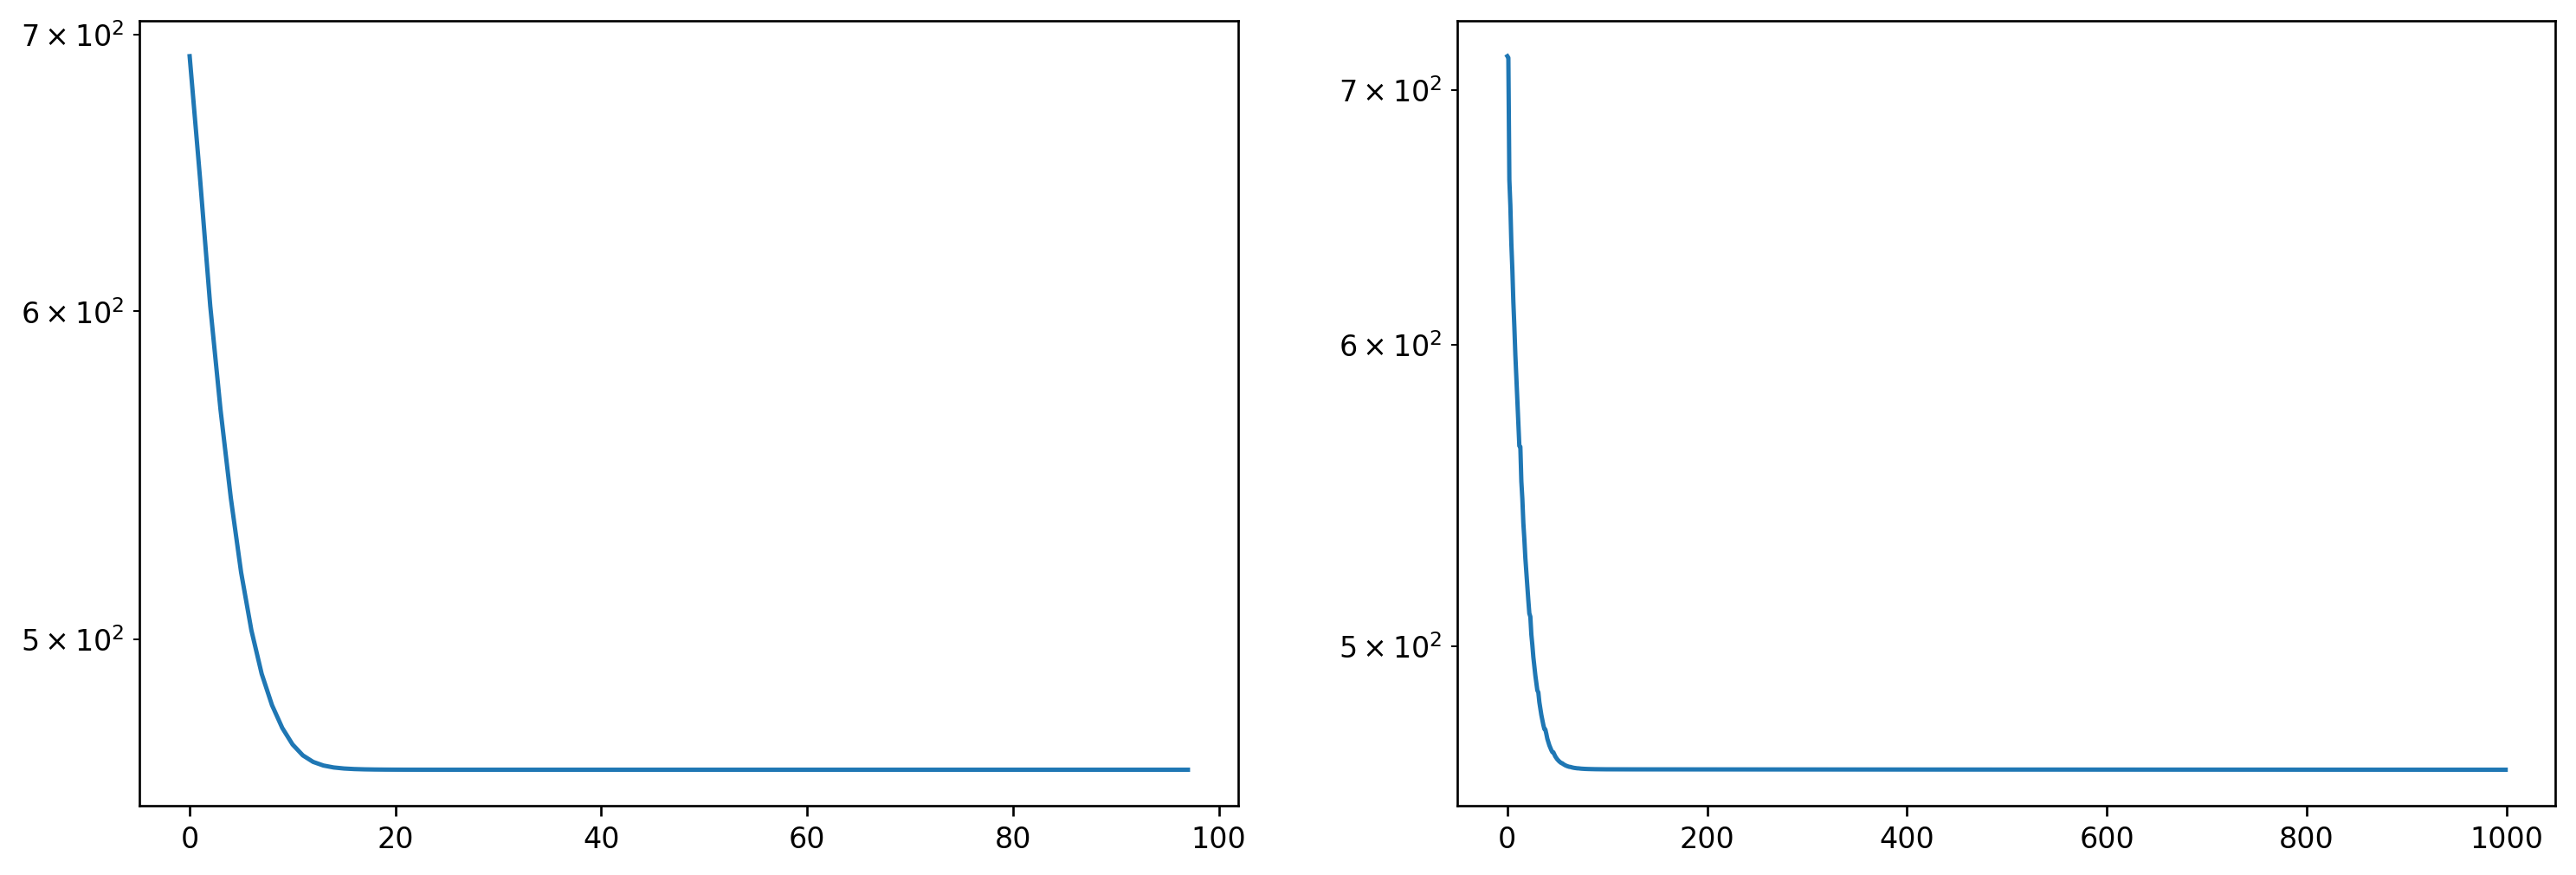

In [63]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15, 5)
fig.set_dpi(240)
im1=axs[0].semilogy(opt_log_lf['iterations']['fx'])
im2=axs[1].semilogy(opt_log_ospca['iterations']['fx'])

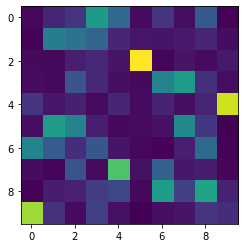

In [46]:
plt.imshow(np.abs(q0.T @ x_lf))

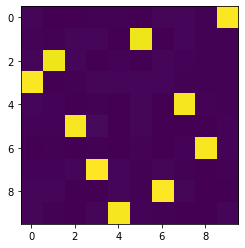

In [47]:
plt.imshow(np.abs(x_ospca.T @ q0))